In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.2'

In [3]:
dd.apply_dark_theme()

In [4]:
path_to_model = os.getcwd()
print(f'Path to model: {path_to_model}')
path_to_data = os.path.dirname(path_to_model)
print(f'Path to data: {path_to_data}')

Path to model: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test
Path to data: /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples


In [5]:
model = dd.Model(path_to_model, simulator_name='Jaxley')

In [6]:
model.load_morphology(file_name='ball-and-stick', soma_notation='3PS')

Sorted PointTree(root=Point(idx=0), num_nodes=17).
Apical dendrite is already aligned.
Extended 6 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=23).


In [7]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   └─•3
     3 |     ├─•4
     4 |     │ ├─•5
     4 |     │ └─•6
     3 |     └─•7
     7 |       ├─•8
     7 |       └─•9


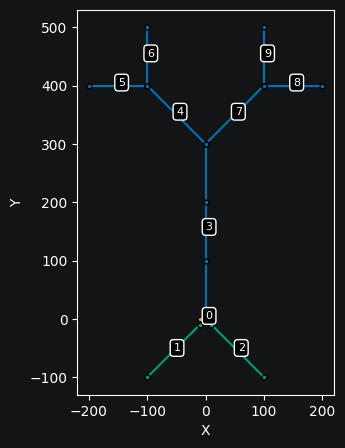

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(ax=ax, annotate=True, show_points=True)

In [9]:
model.seg_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     1 |   │ └─•2
     2 |   │   └─•3
     0 |   ├─•4
     4 |   │ └─•5
     5 |   │   └─•6
     0 |   └─•7
     7 |     └─•8
     8 |       └─•9
     9 |         └─•10
    10 |           └─•11
    11 |             ├─•12
    12 |             │ └─•13
    13 |             │   └─•14
    14 |             │     ├─•15
    15 |             │     │ └─•16
    16 |             │     │   └─•17
    14 |             │     └─•18
    18 |             │       └─•19
    19 |             │         └─•20
    11 |             └─•21
    21 |               └─•22
    22 |                 └─•23
    23 |                   ├─•24
    24 |                   │ └─•25
    25 |                   │   └─•26
    23 |                   └─•27
    27 |                     └─•28
    28 |                       └─•29


In [10]:
len(model.seg_tree)

30

In [11]:
# model._cell.nodes

In [12]:
model.add_default_mechanisms()

In [13]:
if model.simulator_name == 'NEURON':
    model.add_mechanism('stdNa')
    model.add_mechanism('stdKv')
    
elif model.simulator_name == 'Jaxley':
    model.add_mechanism(
        'stdNa',
        python_template_name='jaxley',
        load=False,
        dir_name='mod',
        recompile=False
    )

    model.add_mechanism(
        'stdKv',
        python_template_name='jaxley',
        load=False,
        dir_name='mod',
        recompile=False
    )

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test/biophys/python/stdNa.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Test/biophys/python/stdKv.py


In [14]:
model.mechanisms

{'Leak': <Mechanism(Leak)>,
 'stdNa': <Mechanism(stdNa)>,
 'stdKv': <Mechanism(stdKv)>}

In [15]:
model.domains

{'apic': <Domain(apic, 7 sections)>,
 'dend': <Domain(dend, 2 sections)>,
 'soma': <Domain(soma, 1 sections)>}

In [16]:
model.domains_to_mechs

{'apic': set(), 'dend': set(), 'soma': set()}

In [17]:
for domain_name in model.domains:
    model.insert_mechanism('Leak', domain_name=domain_name, distribute=False)

In [18]:
for domain_name in model.domains:
    try:
        model.insert_mechanism('stdNa', domain_name=domain_name, distribute=False)
    except:
        print(f'Failed to insert stdNa into {domain_name} domain')
        pass

In [19]:
for domain_name in model.domains:
    try:
        model.insert_mechanism('stdKv', domain_name=domain_name, distribute=False)
    except:
        print(f'Failed to insert stdKv into {domain_name} domain')
        pass

In [20]:
model.set_param('gbar_Leak', value=0.0001)
model.set_param('gbar_stdNa', value=0.03)
model.set_param('gbar_stdNa', group_name='somatic', value=0.05)
model.set_param('gbar_stdKv', value=0.003)
model.set_param('gbar_stdKv', group_name='somatic', value=0.005)
model.set_param('Ra', value=100)
model.set_param('cm', value=1)
# model.set_param('gbar_Leak',
#     distr_type='linear', slope=0.000_01, intercept=0.005)

In [21]:
model.distribute_all()

Error distributing parameter 'ena': "Key 'ena' not found in nodes or edges"
Error distributing parameter 'ek': "Key 'ek' not found in nodes or edges"


In [22]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,Ra,all,constant,{'value': 100}
2,Independent,ena,all,constant,{'value': 50}
3,Independent,ek,all,constant,{'value': -77}
4,Leak,gbar_Leak,all,constant,{'value': 0.0001}
5,Leak,e_Leak,all,constant,{'value': -70.0}
6,stdNa,vhalf_m_stdNa,all,constant,{'value': -32.571}
7,stdNa,sigma_m_stdNa,all,constant,{'value': 9.8}
8,stdNa,k_m_stdNa,all,constant,{'value': 1.882}
9,stdNa,delta_m_stdNa,all,constant,{'value': 0.541}


In [23]:
# model._cell.nodes

In [24]:
# model.sec_tree[5]._ref.nodes

In [25]:
model.add_iclamp(sec=model.sec_tree[0], loc=0.5, amp=0.15, dur=100, delay=100)

IClamp added to sec JaxleySection(idx=0) at loc 0.5.


In [26]:
model.simulator.add_recording(sec=model.sec_tree[0], loc=0.5)

Added 1 recordings. See `.recordings` for details.


In [27]:
# model.simulator.add_recording(sec=model.sec_tree[-1], loc=0.5)

In [28]:
model.mechanisms['stdNa'].set_tadj(37)
model.mechanisms['stdKv'].set_tadj(37)

In [29]:
model.simulator.run(duration=300)

Added 1 external_states. See `.externals` for details.


In [30]:
path_to_voltage = os.path.join(path_to_model, 'voltage.npy')
t = model.simulator.t
v_orig = np.load(path_to_voltage)

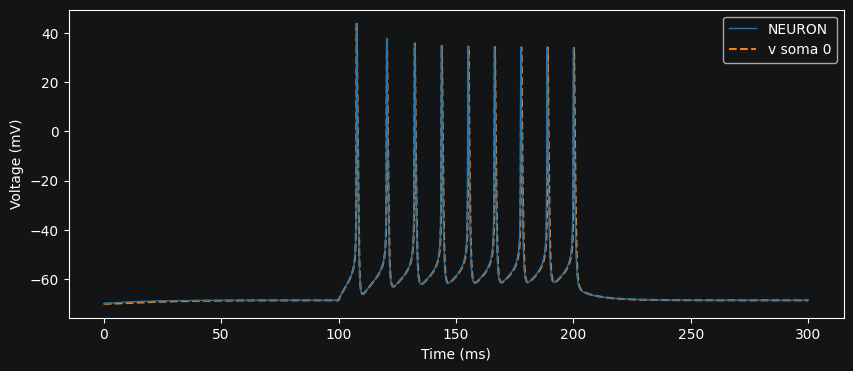

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(t, v_orig, color='C0', linestyle='-', zorder=10, lw=1, label='NEURON')
model.simulator.plot_voltage(ax=ax, linestyle='--', color='C1')

In [ ]:
# soma = model.sec_tree[0]
# t, v_orig = model.simulator.t, model.simulator.recordings['v'][soma(0.5)]

In [ ]:
# path_to_voltage = os.path.join(path_to_model, 'voltage.npy')
# np.save(path_to_voltage, v_orig)

Text(0.5, 1.0, 'Jaxley')

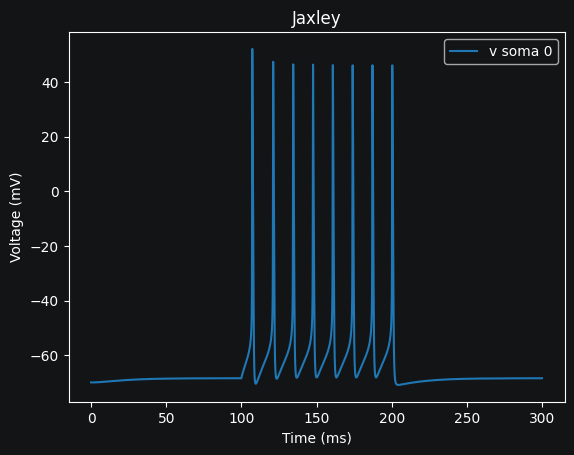

In [31]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)

Text(0.5, 1.0, 'NEURON')

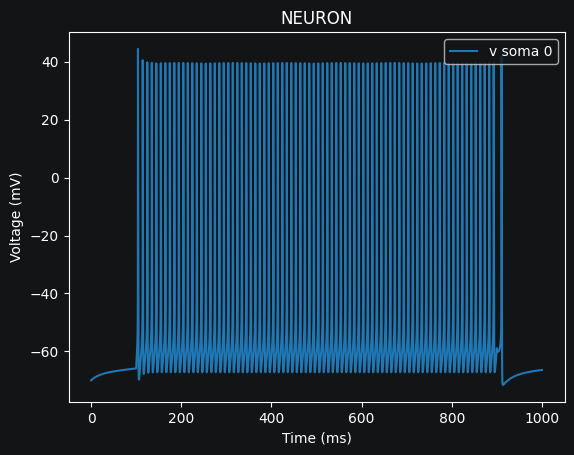

In [31]:
model.simulator.plot_voltage()
plt.title(model.simulator_name)